In [9]:
import pandas as pd

# Load the CSV data into a DataFrame
jokes_df = pd.read_csv('dataset.csv')

# print the first 5 rows of the DataFrame
print(jokes_df.head())


                                                text  humor
0  Joe biden rules out 2020 bid: 'guys, i'm not r...  False
1  Watch: darvish gave hitter whiplash with slow ...  False
2  What do you call a turtle without its shell? d...   True
3      5 reasons the 2016 election feels so personal  False
4  Pasco police shot mexican migrant from behind,...  False


In [10]:
# Display the DataFrame
jokes_df.head()

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False


In [11]:
jokes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    200000 non-null  object
 1   humor   200000 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.7+ MB


200k different jokes in a dataframe with target 'humor' column of boolean type. 

In [12]:
jokes_df.isnull().sum()

text     0
humor    0
dtype: int64

No null values.

In [13]:
print(len(jokes_df['text'].unique()))

200000


There are no duplicate jokes.

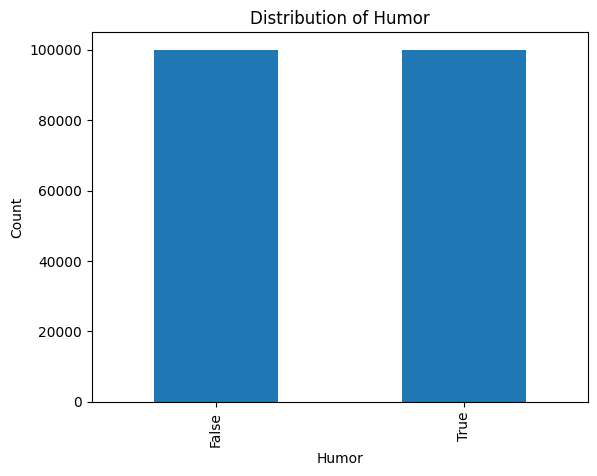

In [14]:
import matplotlib.pyplot as plt

# Count the number of True and False values in the 'humor' column
humor_counts = jokes_df['humor'].value_counts()

# Create a bar chart of the counts
humor_counts.plot(kind='bar')

# Set the x and y labels and title
plt.xlabel('Humor')
plt.ylabel('Count')
plt.title('Distribution of Humor')

# Show the plot
plt.show()

In [15]:
import nltk
from nltk.corpus import stopwords
import string
import re

# Download the stopwords corpus
nltk.download('stopwords')

# Define a function to preprocess the jokes
def preprocess_jokes(jokes_df):
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    jokes_df['clean_joke'] = jokes_df['text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if (word.lower() not in stop_words) and (word.lower() not in string.punctuation)]))
    return jokes_df

# Define a function to remove punctuation
def remove_punctuation(text):
    # Define the regular expression pattern to match any punctuation character
    pattern = r'[^\w\s]'

    # Use the sub() function to replace any matches with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:

# Preprocess the jokes
preprocess_jokes(jokes_df)

# Apply the remove_punctuation function to the Clean_joke column
jokes_df['clean_joke'] = jokes_df['clean_joke'].apply(remove_punctuation)


In [17]:
jokes_df.head()

,text,humor,clean_joke
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,joe biden rules 2020 bid guys im running
1,Watch: darvish gave hitter whiplash with slow ...,False,watch darvish gave hitter whiplash slow pitch
2,What do you call a turtle without its shell? d...,True,call turtle without shell dead
3,5 reasons the 2016 election feels so personal,False,5 reasons 2016 election feels personal
4,"Pasco police shot mexican migrant from behind,...",False,pasco police shot mexican migrant behind new a...


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

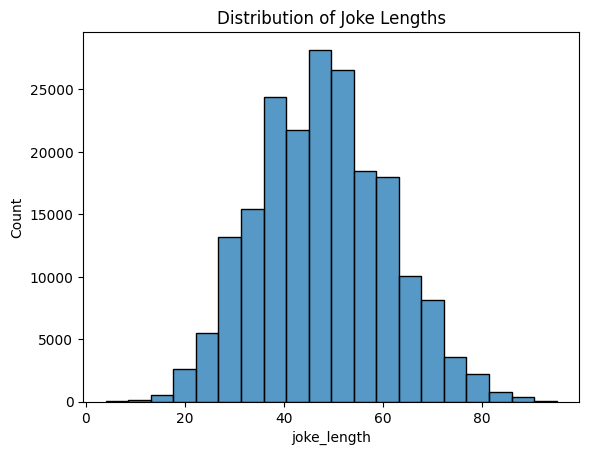

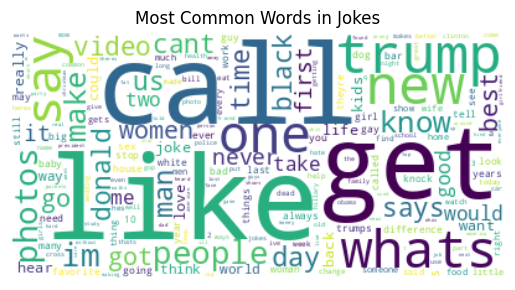

In [19]:
# Visualize the distribution of joke lengths
jokes_df['joke_length'] = jokes_df['clean_joke'].apply(lambda x: len(x))
sns.histplot(data=jokes_df, x='joke_length', bins=20)
plt.title('Distribution of Joke Lengths')
plt.show()

# Visualize the most common words in the jokes
from collections import Counter
from wordcloud import WordCloud

all_jokes = ' '.join(jokes_df['clean_joke'])
word_counts = Counter(all_jokes.split())
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Jokes')
plt.show()

In [20]:
jokes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   text         200000 non-null  object
 1   humor        200000 non-null  bool  
 2   clean_joke   200000 non-null  object
 3   joke_length  200000 non-null  int64 
dtypes: bool(1), int64(1), object(2)
memory usage: 4.8+ MB


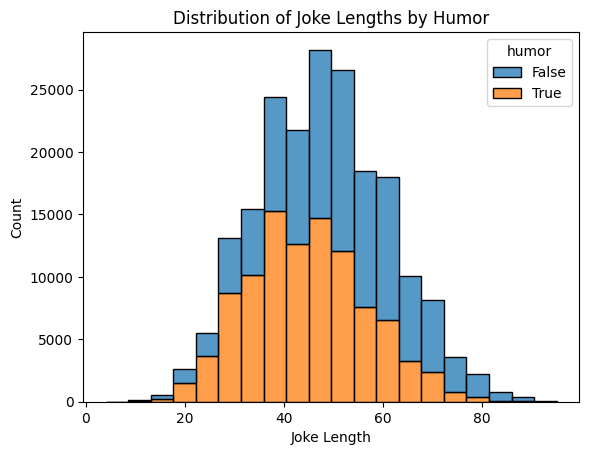

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=jokes_df, x='joke_length', bins=20, hue='humor', multiple='stack')
plt.title('Distribution of Joke Lengths by Humor')
plt.xlabel('Joke Length')
plt.ylabel('Count')
plt.show()


In [22]:

humorous_jokes_df = jokes_df[jokes_df['humor'] == True]


In [23]:
humorous_jokes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 2 to 199999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   text         100000 non-null  object
 1   humor        100000 non-null  bool  
 2   clean_joke   100000 non-null  object
 3   joke_length  100000 non-null  int64 
dtypes: bool(1), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the model from TensorFlow Hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
model = hub.load(module_url)


In [ ]:
# Define batch size
BATCH_SIZE = 1000

# Initialize empty list to store encoded joke vectors
joke_vectors_list = []

# Encode jokes in batches
for i in range(0, len(humorous_jokes_df), BATCH_SIZE):
    # Get a batch of jokes
    batch_jokes = humorous_jokes_df["clean_joke"][i:i+BATCH_SIZE]
    
    # Encode the batch of jokes into vectors
    batch_vectors = model(batch_jokes).numpy()
    
    # Append the batch of vectors to the list
    joke_vectors_list.append(batch_vectors)



In [ ]:
import numpy as np

    
# Concatenate the list of vectors into a single numpy array
joke_vectors_array = np.concatenate(joke_vectors_list)

# Print the shape of the joke vectors array
print(joke_vectors_array.shape)

(100000, 512)


In [ ]:
print(joke_vectors_array[:10])


[[-0.10272926 -0.01983313 -0.00284022 ... -0.00134287 -0.0245461
   0.02391309]
 [ 0.00263279  0.08414213  0.02961861 ...  0.04268469  0.07342681
   0.04781407]
 [ 0.02592236 -0.01635438 -0.02989341 ... -0.01631698 -0.07111952
   0.03338585]
 ...
 [ 0.04659941 -0.0460685  -0.00383115 ...  0.03140274  0.04096763
   0.05693741]
 [ 0.06997935 -0.06368115 -0.0437464  ... -0.07381413  0.01135412
  -0.00506185]
 [ 0.01967495 -0.00077027  0.06616988 ... -0.01556989  0.04132042
   0.03782702]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

batch_size = 1000

similarity_matrix = None

# Compute the pairwise cosine similarity between all joke vectors in batches
for i in range(0, len(joke_vectors_array), batch_size):
    batch_vectors = joke_vectors_array[i:i+batch_size]
    if len(batch_vectors) < batch_size:  # pad the last batch if necessary
        num_padding_rows = batch_size - len(batch_vectors)
        padding_vectors = np.zeros((num_padding_rows, joke_vectors_array.shape[1]))
        batch_vectors = np.concatenate([batch_vectors, padding_vectors], axis=0)
    if similarity_matrix is None:
        similarity_matrix = cosine_similarity(batch_vectors)
    else:
        similarity_matrix = np.concatenate(
            [similarity_matrix, cosine_similarity(batch_vectors)], axis=0)

# Print the shape of the similarity matrix
print(similarity_matrix.shape)


(100000, 1000)


In [ ]:
import tensorflow_hub as hub

# Load the Universal Sentence Encoder model from TensorFlow Hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

In [ ]:
# Given a user's input, encode it into a vector representation using the same Universal Sentence Encoder model.
user_input = input("Enter a sentence: ")


Enter a sentence: mister magorium wonder emporium if I'm spelling that right


In [ ]:
user_input_vector = embed([user_input])[0].numpy()
similarity_scores = cosine_similarity(user_input_vector.reshape(1, -1), joke_vectors_array)

In [ ]:
# Get the number of jokes to recommend from the user
num_jokes = int(input("How many jokes would you like to see? "))

How many jokes would you like to see? 30


In [ ]:
# Get the top-n jokes with the highest similarity scores
top_indices = np.argsort(similarity_scores, axis=1)[:, ::-1][:, :num_jokes].ravel()

In [ ]:
top_jokes = [humorous_jokes_df.iloc[i] for i in top_indices]

In [ ]:
top_jokes

[text           What was the burglar doing in wayne manor? he ...
 humor                                                       True
 clean_joke                             burglar wayne manor robin
 joke_length                                                   25
 Name: 180413, dtype: object,
 text           What was the burglar doing at wayne manor? robin.
 humor                                                       True
 clean_joke                             burglar wayne manor robin
 joke_length                                                   25
 Name: 195551, dtype: object,
 text           I've been trying to think of a name for my cri...
 humor                                                       True
 clean_joke         ive trying think name cricket shop im stumped
 joke_length                                                   45
 Name: 32430, dtype: object,
 text           Im opening a diy whorehouse. it's called go fu...
 humor                                               

In [ ]:
# Print the top-n jokes
print(f"Top {num_jokes} jokes:")
for i, joke in enumerate(top_jokes):
    print(f"{i+1}. {joke.text}")


Top 30 jokes:
1. What was the burglar doing in wayne manor? he was robin.
2. What was the burglar doing at wayne manor? robin.
3. I've been trying to think of a name for my cricket shop. but i'm stumped.
4. Im opening a diy whorehouse. it's called go fuck yourself.
5. Why doesn't mr t like cream and mashed fruit? he pities the fool.
6. What do you call a round knight? sir cumference
7. Who was king author's most well rounded knight? sir cumference.
8. My grandad had a pet shop. which was a stupid thing to have as a pet.
9. What do you call a baby born in a whorehouse? a brothel sprout
10. Are kids that are born in a whorehouse called brothel sprouts?
11. My grandfather was a baker in the army... ...he went in all buns glazing.
12. How did harry get it in ron's sweet diagon alley? a lubricantation.
13. Why doesn't batman like going to robin's house? they don't like rich people in robin's hood
14. Come to crab's joe shack we have stu.
15. I'm pretty sure robin hood was black and he was j

NOW TIME FOR  supervised learning model that uses the Universal Sentence Encoder to encode the textual data and a simple regression model to predict the score of each joke.

In [ ]:
jokes_df.head()

,text,humor,clean_joke,joke_length
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,joe biden rules 2020 bid guys im running,40
1,Watch: darvish gave hitter whiplash with slow ...,False,watch darvish gave hitter whiplash slow pitch,45
2,What do you call a turtle without its shell? d...,True,call turtle without shell dead,30
3,5 reasons the 2016 election feels so personal,False,5 reasons 2016 election feels personal,38
4,"Pasco police shot mexican migrant from behind,...",False,pasco police shot mexican migrant behind new a...,58


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X = jokes_df[['clean_joke']]  # added closing bracket
y = jokes_df['humor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.to_numpy().squeeze()
X_test = X_test.to_numpy().squeeze()


# vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train_vec, y_train)

# predict on training data
y_train_pred = clf.predict(X_train_vec)

# calculate accuracy score on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# predict on test data
y_pred = clf.predict(X_test_vec)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Training Accuracy: 0.92921875
Test Accuracy: 0.9108


In [ ]:
from sklearn.metrics import classification_report

# get classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

       False       0.91      0.91      0.91     20001
        True       0.91      0.91      0.91     19999

    accuracy                           0.91     40000
   macro avg       0.91      0.91      0.91     40000
weighted avg       0.91      0.91      0.91     40000



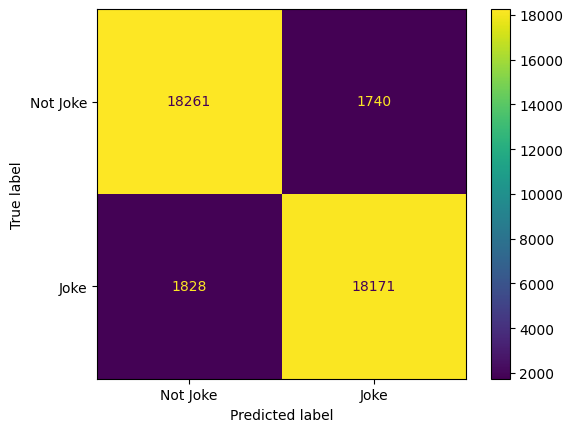

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# assume y_true and y_pred are already defined
y_pred_binary = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_binary)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()


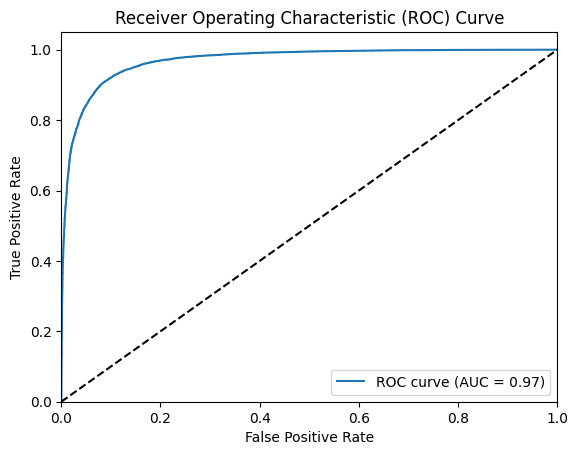

In [ ]:
from sklearn.metrics import roc_curve, auc

# predict probabilities for test set
y_pred_proba = clf.predict_proba(X_test_vec)[:, 1]

# calculate false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np

# take a random sample of 500 rows
jokes_sampled = jokes_df.sample(n=20000, random_state=42)

# Split the data into training and testing sets
X = jokes_sampled[['clean_joke']]
y = jokes_sampled['humor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to numpy arrays
X_train = X_train.to_numpy().squeeze()
X_test = X_test.to_numpy().squeeze()

# vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define batch size and number of epochs
batch_size = 16
epochs = 10

# Build the neural network model
input_dim = X_train_vec.shape[1]
model = Sequential()
model.add(Dense(64, input_shape=(input_dim,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_vec.toarray(), y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_vec.toarray(), y_test))


Epoch 1/10
1000/1000 [==============================] - 25s 24ms/step - loss: 0.3738 - accuracy: 0.8333 - val_loss: 0.2953 - val_accuracy: 0.8752
Epoch 2/10
1000/1000 [==============================] - 23s 23ms/step - loss: 0.1294 - accuracy: 0.9540 - val_loss: 0.3467 - val_accuracy: 0.8737
Epoch 3/10
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0505 - accuracy: 0.9834 - val_loss: 0.4523 - val_accuracy: 0.8675
Epoch 4/10
1000/1000 [==============================] - 22s 22ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.5553 - val_accuracy: 0.8640
Epoch 5/10
1000/1000 [==============================] - 22s 22ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.6822 - val_accuracy: 0.8660
Epoch 6/10
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.7860 - val_accuracy: 0.8627
Epoch 7/10
1000/1000 [==============================] - 23s 23ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.8997 -

In [ ]:
# Predict on test data
y_pred_prob = model.predict(X_test_vec.toarray())
y_pred = (y_pred_prob > 0.5).astype(int)


125/125 [==============================] - 1s 9ms/step


In [ ]:
train_loss, train_accuracy = model.evaluate(X_train_vec.toarray(), y_train)
test_loss, test_accuracy = model.evaluate(X_test_vec.toarray(), y_test)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


125/125 [==============================] - 1s 7ms/step - loss: 1.1423 - accuracy: 0.8658
Train Loss: 0.00016202959523070604
Train Accuracy: 0.9999374747276306
Test Loss: 1.142337679862976
Test Accuracy: 0.8657500147819519


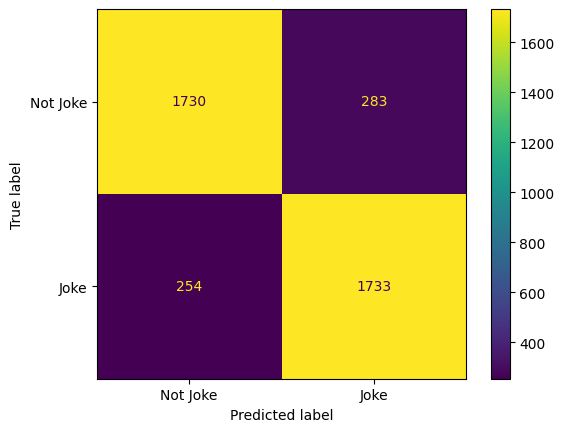

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()


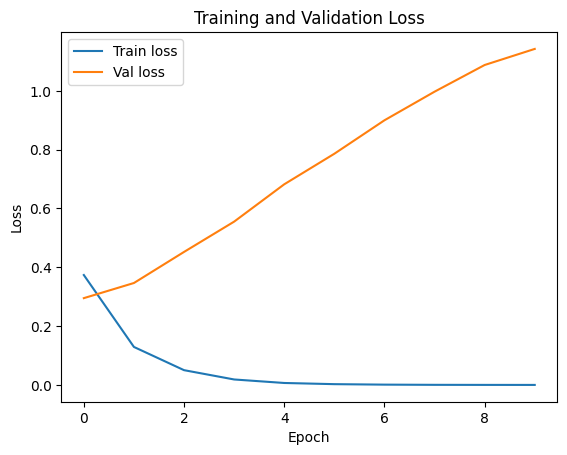

In [ ]:
# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# get classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.87      0.86      0.87      2013
        True       0.86      0.87      0.87      1987

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000



Overfitting, so will be adding L2 regularization to the model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers
import numpy as np

# take a random sample of 500 rows
jokes_sampled = jokes_df.sample(n=20000, random_state=42)

# Split the data into training and testing sets
X = jokes_sampled[['clean_joke']]
y = jokes_sampled['humor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to numpy arrays
X_train = X_train.to_numpy().squeeze()
X_test = X_test.to_numpy().squeeze()

# vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define batch size and number of epochs
batch_size = 16
epochs = 10

# Build the neural network model
input_dim = X_train_vec.shape[1]
model = Sequential()
model.add(Dense(64, input_shape=(input_dim,), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_vec.toarray(), y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_vec.toarray(), y_test))



Epoch 1/10
1000/1000 [==============================] - 33s 32ms/step - loss: 0.7771 - accuracy: 0.7359 - val_loss: 0.7368 - val_accuracy: 0.8315
Epoch 2/10
1000/1000 [==============================] - 39s 39ms/step - loss: 0.7425 - accuracy: 0.8284 - val_loss: 0.7334 - val_accuracy: 0.8315
Epoch 3/10
1000/1000 [==============================] - 25s 25ms/step - loss: 0.7173 - accuracy: 0.8406 - val_loss: 0.6985 - val_accuracy: 0.8503
Epoch 4/10
1000/1000 [==============================] - 26s 26ms/step - loss: 0.7021 - accuracy: 0.8411 - val_loss: 0.6853 - val_accuracy: 0.8533
Epoch 5/10
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6828 - accuracy: 0.8468 - val_loss: 0.6852 - val_accuracy: 0.8482
Epoch 6/10
1000/1000 [==============================] - 25s 25ms/step - loss: 0.6726 - accuracy: 0.8521 - val_loss: 0.6714 - val_accuracy: 0.8518
Epoch 7/10
1000/1000 [==============================] - 24s 24ms/step - loss: 0.6561 - accuracy: 0.8576 - val_loss: 0.6613 -

In [ ]:
# Predict on test data
y_pred_prob = model.predict(X_test_vec.toarray())
y_pred = (y_pred_prob > 0.5).astype(int)


125/125 [==============================] - 1s 10ms/step


In [ ]:
train_loss, train_accuracy = model.evaluate(X_train_vec.toarray(), y_train)
test_loss, test_accuracy = model.evaluate(X_test_vec.toarray(), y_test)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


125/125 [==============================] - 1s 7ms/step - loss: 0.6572 - accuracy: 0.8440
Train Loss: 0.5716061592102051
Train Accuracy: 0.8952500224113464
Test Loss: 0.6572346091270447
Test Accuracy: 0.843999981880188


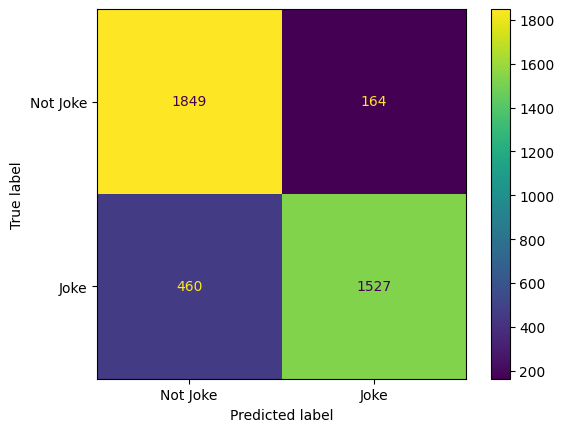

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()


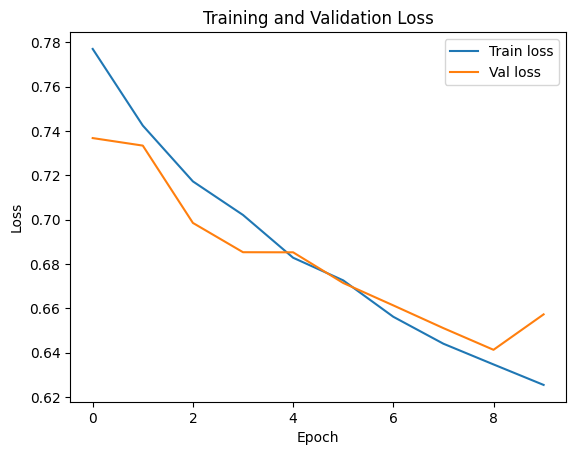

In [ ]:
# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


Updating architecture of model to try and improve accuracy. Try without L2 regularization and with increased dropout rate.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np

# take a random sample of 20000 rows
jokes_sampled = jokes_df.sample(n=20000, random_state=42)

# Split the data into training and testing sets
X = jokes_sampled[['clean_joke']]
y = jokes_sampled['humor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to numpy arrays
X_train = X_train.to_numpy().squeeze()
X_test = X_test.to_numpy().squeeze()

# vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define batch size and number of epochs
batch_size = 16
epochs = 10

# Build the neural network model
input_dim = X_train_vec.shape[1]
model = Sequential()
model.add(Dense(64, input_shape=(input_dim,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_vec.toarray(), y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_vec.toarray(), y_test))


Epoch 1/10
1000/1000 [==============================] - 25s 23ms/step - loss: 0.4269 - accuracy: 0.8035 - val_loss: 0.2938 - val_accuracy: 0.8805
Epoch 2/10
1000/1000 [==============================] - 20s 20ms/step - loss: 0.1903 - accuracy: 0.9322 - val_loss: 0.3105 - val_accuracy: 0.8785
Epoch 3/10
1000/1000 [==============================] - 20s 20ms/step - loss: 0.1024 - accuracy: 0.9661 - val_loss: 0.3638 - val_accuracy: 0.8770
Epoch 4/10
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0609 - accuracy: 0.9795 - val_loss: 0.4327 - val_accuracy: 0.8740
Epoch 5/10
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0389 - accuracy: 0.9885 - val_loss: 0.5053 - val_accuracy: 0.8740
Epoch 6/10
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0241 - accuracy: 0.9927 - val_loss: 0.5872 - val_accuracy: 0.8712
Epoch 7/10
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.6797 -

In [28]:
# Predict on test data
y_pred_prob = model.predict(X_test_vec.toarray())
y_pred = (y_pred_prob > 0.5).astype(int)


125/125 [==============================] - 1s 6ms/step


In [29]:
train_loss, train_accuracy = model.evaluate(X_train_vec.toarray(), y_train)
test_loss, test_accuracy = model.evaluate(X_test_vec.toarray(), y_test)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

125/125 [==============================] - 1s 6ms/step - loss: 0.8776 - accuracy: 0.8625
Train Loss: 0.0004075330216437578
Train Accuracy: 0.999875009059906
Test Loss: 0.8776341676712036
Test Accuracy: 0.862500011920929


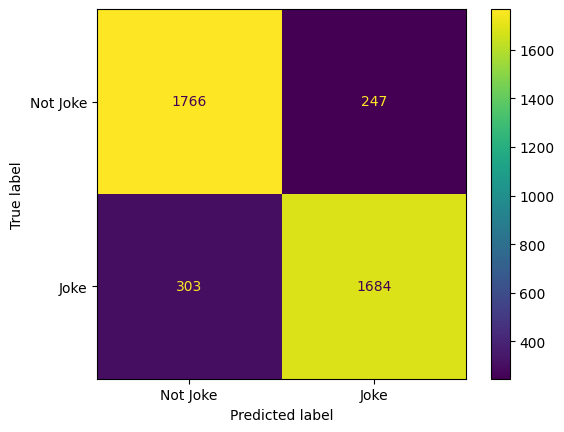

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()


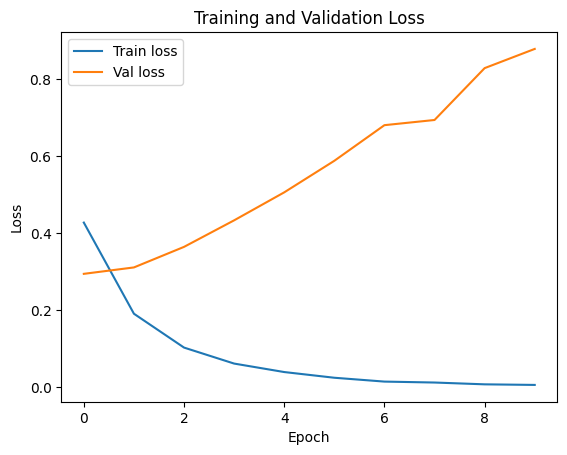

In [31]:
# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Try 20% dropout with L2 regularization.

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers
import numpy as np

# take a random sample of 500 rows
jokes_sampled = jokes_df.sample(n=20000, random_state=42)

# Split the data into training and testing sets
X = jokes_sampled[['clean_joke']]
y = jokes_sampled['humor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to numpy arrays
X_train = X_train.to_numpy().squeeze()
X_test = X_test.to_numpy().squeeze()

# vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define batch size and number of epochs
batch_size = 16
epochs = 10

# Build the neural network model with 20% dropout and L2 regularization
input_dim = X_train_vec.shape[1]
model = Sequential()
model.add(Dense(64, input_shape=(input_dim,), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_vec.toarray(), y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_vec.toarray(), y_test))


Epoch 1/10
1000/1000 [==============================] - 24s 23ms/step - loss: 0.7724 - accuracy: 0.7225 - val_loss: 0.7413 - val_accuracy: 0.8310
Epoch 2/10
1000/1000 [==============================] - 22s 22ms/step - loss: 0.7446 - accuracy: 0.8276 - val_loss: 0.7477 - val_accuracy: 0.8070
Epoch 3/10
1000/1000 [==============================] - 21s 21ms/step - loss: 0.7227 - accuracy: 0.8351 - val_loss: 0.7049 - val_accuracy: 0.8378
Epoch 4/10
1000/1000 [==============================] - 21s 21ms/step - loss: 0.7026 - accuracy: 0.8399 - val_loss: 0.6946 - val_accuracy: 0.8457
Epoch 5/10
1000/1000 [==============================] - 22s 22ms/step - loss: 0.6873 - accuracy: 0.8457 - val_loss: 0.6782 - val_accuracy: 0.8510
Epoch 6/10
1000/1000 [==============================] - 21s 21ms/step - loss: 0.6749 - accuracy: 0.8504 - val_loss: 0.6714 - val_accuracy: 0.8480
Epoch 7/10
1000/1000 [==============================] - 21s 21ms/step - loss: 0.6660 - accuracy: 0.8509 - val_loss: 0.6596 -

In [33]:
# Predict on test data
y_pred_prob = model.predict(X_test_vec.toarray())
y_pred = (y_pred_prob > 0.5).astype(int)


125/125 [==============================] - 1s 10ms/step


In [34]:
train_loss, train_accuracy = model.evaluate(X_train_vec.toarray(), y_train)
test_loss, test_accuracy = model.evaluate(X_test_vec.toarray(), y_test)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

125/125 [==============================] - 2s 12ms/step - loss: 0.6282 - accuracy: 0.8625
Train Loss: 0.5408730506896973
Train Accuracy: 0.9169374704360962
Test Loss: 0.6281905770301819
Test Accuracy: 0.862500011920929


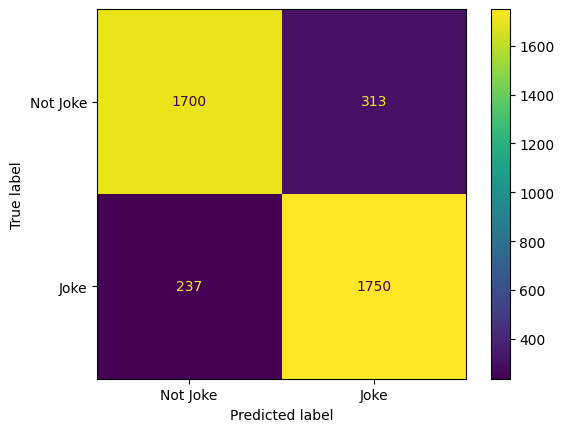

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()

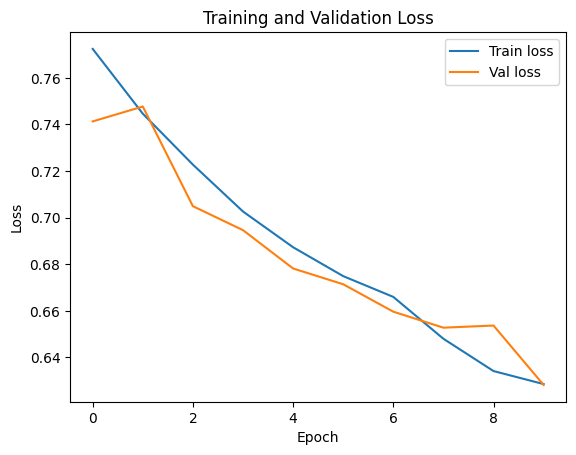

In [36]:
# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers
import numpy as np

# take a random sample of 500 rows
jokes_sampled = jokes_df.sample(n=20000, random_state=42)

# Split the data into training and testing sets
X = jokes_sampled[['clean_joke']]
y = jokes_sampled['humor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to numpy arrays
X_train = X_train.to_numpy().squeeze()
X_test = X_test.to_numpy().squeeze()

# vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define batch size and number of epochs
batch_size = 16
epochs = 20

# Build the neural network model with 20% dropout and L2 regularization
input_dim = X_train_vec.shape[1]
model = Sequential()
model.add(Dense(64, input_shape=(input_dim,), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
history = model.fit(X_train_vec.toarray(), y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_vec.toarray(), y_test), callbacks=[early_stopping])



Epoch 1/20
1000/1000 [==============================] - 32s 29ms/step - loss: 0.7798 - accuracy: 0.7629 - val_loss: 0.7381 - val_accuracy: 0.8363
Epoch 2/20
1000/1000 [==============================] - 22s 22ms/step - loss: 0.7497 - accuracy: 0.8296 - val_loss: 0.7234 - val_accuracy: 0.8487
Epoch 3/20
1000/1000 [==============================] - 23s 23ms/step - loss: 0.7254 - accuracy: 0.8357 - val_loss: 0.7073 - val_accuracy: 0.8420
Epoch 4/20
1000/1000 [==============================] - 24s 24ms/step - loss: 0.7087 - accuracy: 0.8413 - val_loss: 0.7036 - val_accuracy: 0.8422
Epoch 5/20
1000/1000 [==============================] - 38s 38ms/step - loss: 0.6891 - accuracy: 0.8469 - val_loss: 0.6746 - val_accuracy: 0.8480
Epoch 6/20
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6663 - accuracy: 0.8494 - val_loss: 0.6639 - val_accuracy: 0.8525
Epoch 7/20
1000/1000 [==============================] - 23s 23ms/step - loss: 0.6503 - accuracy: 0.8570 - val_loss: 0.6531 -

In [ ]:
# Predict on test data
y_pred_prob = model.predict(X_test_vec.toarray())
y_pred = (y_pred_prob > 0.5).astype(int)

In [ ]:
train_loss, train_accuracy = model.evaluate(X_train_vec.toarray(), y_train)
test_loss, test_accuracy = model.evaluate(X_test_vec.toarray(), y_test)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()

In [ ]:
# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()